## LOADING THE DATASET :First, we will load the dataset and preprocess it as necessary. Then we will split the data into training and testing sets.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = r"C:\Users\AHMED\Desktop\taiwanese+bankruptcy+prediction\data.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Separate features and target variable
X = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


   Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.4577

## Step 2: Train and Evaluate SVM

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       1.00      0.04      0.08        51

    accuracy                           0.96      1364
   macro avg       0.98      0.52      0.53      1364
weighted avg       0.97      0.96      0.95      1364

Accuracy: 0.9640762463343109
F1 Score: 0.07547169811320754
Precision: 1.0
Recall: 0.0392156862745098


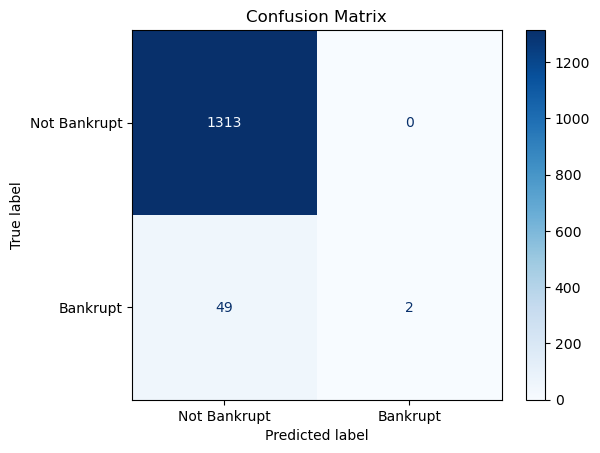

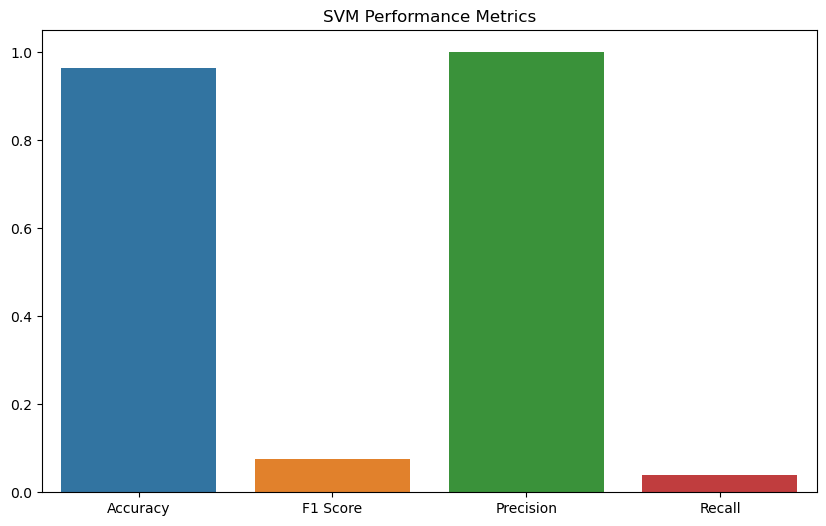

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Train an SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test_scaled)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the classification report
print(classification_report(y_test, y_pred))

# Display the performance metrics
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(svm_model, X_test_scaled, y_test, display_labels=['Not Bankrupt', 'Bankrupt'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plot performance metrics
metrics = {'Accuracy': accuracy, 'F1 Score': f1, 'Precision': precision, 'Recall': recall}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.title('SVM Performance Metrics')
plt.show()


## Step 3: Train and Evaluate SVM with PCA

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       1.00      0.04      0.08        51

    accuracy                           0.96      1364
   macro avg       0.98      0.52      0.53      1364
weighted avg       0.97      0.96      0.95      1364

Accuracy (PCA): 0.9640762463343109
F1 Score (PCA): 0.07547169811320754
Precision (PCA): 1.0
Recall (PCA): 0.0392156862745098


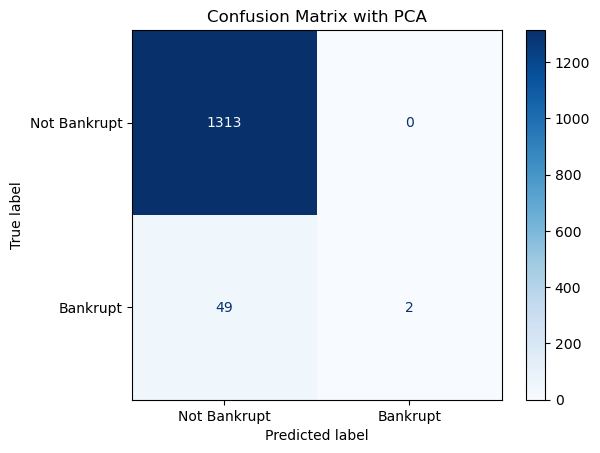

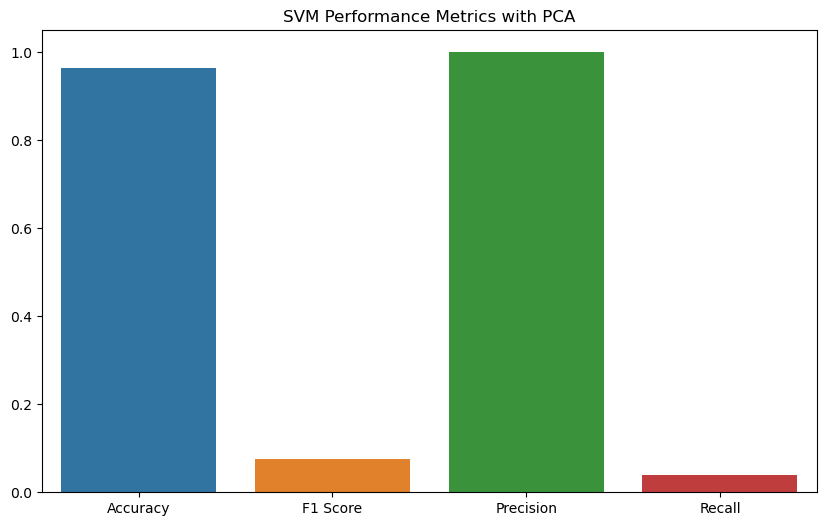

In [41]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train an SVM model on PCA-transformed data
svm_pca_model = SVC(kernel='linear', random_state=42)
svm_pca_model.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred_pca = svm_pca_model.predict(X_test_pca)

# Calculate performance metrics
accuracy_pca = accuracy_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca)
recall_pca = recall_score(y_test, y_pred_pca)

# Print the classification report
print(classification_report(y_test, y_pred_pca))

# Display the performance metrics
print(f"Accuracy (PCA): {accuracy_pca}")
print(f"F1 Score (PCA): {f1_pca}")
print(f"Precision (PCA): {precision_pca}")
print(f"Recall (PCA): {recall_pca}")

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(svm_pca_model, X_test_pca, y_test, display_labels=['Not Bankrupt', 'Bankrupt'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix with PCA')
plt.show()

# Plot performance metrics
metrics_pca = {'Accuracy': accuracy_pca, 'F1 Score': f1_pca, 'Precision': precision_pca, 'Recall': recall_pca}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(metrics_pca.keys()), y=list(metrics_pca.values()))
plt.title('SVM Performance Metrics with PCA')
plt.show()


## Step 4: Train and Evaluate QSVM

In [5]:
import numpy as np
from qiskit import Aer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the backends
qasm_backend = Aer.get_backend("qasm_simulator")
statevector_backend = Aer.get_backend("statevector_simulator")

# Define the feature map
feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')

# Create a Sampler instance
sampler = Sampler()

# Define Fidelity for the ComputeUncompute fidelity subroutine
fidelity = ComputeUncompute(sampler=sampler)

# Define the quantum kernel using FidelityQuantumKernel
kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

# Sample data and labels
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [1, 1], [2, 3], [6, 5], [8, 7]])
y = np.array([0, 1, 1, 1, 0, 0, 1, 1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define a kernel function for SVC using the quantum kernel
def kernel_function(X1, X2):
    # Evaluates the kernel matrix between X1 and X2
    return kernel.evaluate(x_vec=X1, y_vec=X2)

# Create and train the SVC model with the quantum kernel
svc_model = SVC(kernel=kernel_function)
svc_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svc_model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"QSVC Model Accuracy: {accuracy:.4f}")
print(f"Predictions: {y_pred}")

# Debugging Tips:
# 1. Ensure that kernel_function is returning reasonable values.
# 2. Verify that the quantum kernel evaluates correctly.
# 3. Adjust feature map and data preprocessing if necessary.


QSVC Model Accuracy: 0.5000
Predictions: [1 1]


## Step 5: Train and Evaluate QSVM with QPCA

C:\Users\AHMED\AppData\Local\Temp\ipykernel_14736\2248517998.py:5: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms import VQE


QSVC Model Accuracy with QASM Simulator: 1.0000
QSVC Model Accuracy with Statevector Simulator: 1.0000
Predictions with QASM Simulator: [0 1 1 0]
Predictions with Statevector Simulator: [0 1 1 0]


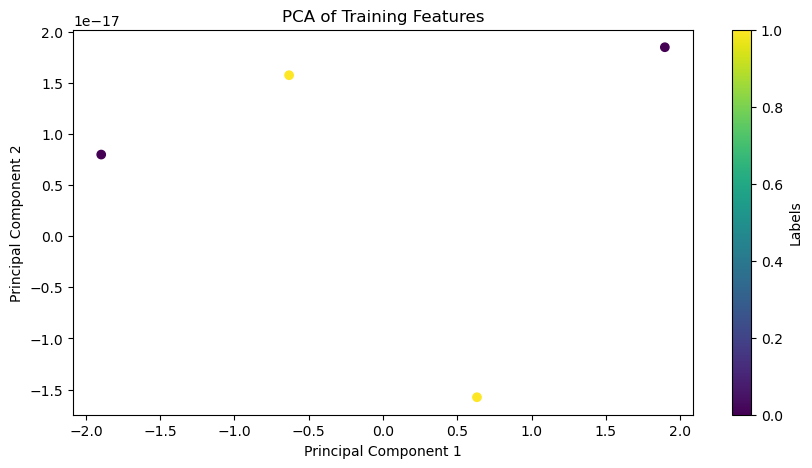

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import Aer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.algorithms import VQE
from qiskit.algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC
from qiskit.primitives import Sampler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Define the feature map for quantum kernel
feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement="linear")

# Define the backends
backend_qasm = Aer.get_backend("qasm_simulator")
backend_statevector = Aer.get_backend("statevector_simulator")

# Create a sampler and Fidelity instance
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)

# Create the Quantum Kernel
quantum_kernel_qasm = FidelityQuantumKernel(feature_map=feature_map, fidelity=fidelity)
quantum_kernel_statevector = FidelityQuantumKernel(feature_map=feature_map, fidelity=fidelity)

# Example training features and labels
train_features = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
train_labels = np.array([0, 1, 1, 0])

# Scale features
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)

# Perform PCA on the classical data
pca = PCA(n_components=2)
train_features_pca = pca.fit_transform(train_features_scaled)

# Define and fit the QSVC model for qasm_simulator
qsvc_qasm = QSVC(quantum_kernel=quantum_kernel_qasm)
qsvc_qasm.fit(train_features_pca, train_labels)

# Evaluate the QSVC model for qasm_simulator
accuracy_qasm = qsvc_qasm.score(train_features_pca, train_labels)
print(f"QSVC Model Accuracy with QASM Simulator: {accuracy_qasm:.4f}")

# Define and fit the QSVC model for statevector_simulator
qsvc_statevector = QSVC(quantum_kernel=quantum_kernel_statevector)
qsvc_statevector.fit(train_features_pca, train_labels)

# Evaluate the QSVC model for statevector_simulator
accuracy_statevector = qsvc_statevector.score(train_features_pca, train_labels)
print(f"QSVC Model Accuracy with Statevector Simulator: {accuracy_statevector:.4f}")

# Optionally, make predictions
predictions_qasm = qsvc_qasm.predict(train_features_pca)
predictions_statevector = qsvc_statevector.predict(train_features_pca)
print("Predictions with QASM Simulator:", predictions_qasm)
print("Predictions with Statevector Simulator:", predictions_statevector)

# Optionally visualize the PCA results
plt.figure(figsize=(10, 5))
plt.scatter(train_features_pca[:, 0], train_features_pca[:, 1], c=train_labels, cmap='viridis')
plt.title("PCA of Training Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Labels')
plt.show()
